##Data gathering

In [1]:
import pandas as pd
df=pd.read_csv('/content/SOCR-HeightWeight.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


#Intuitive data modifications

In [2]:
df=df.drop('Index', axis=1)
df

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


##Data quality checks

In [3]:
df.dtypes

,0
Height(Inches),float64
Weight(Pounds),float64


In [4]:
df[(df['Height(Inches)']<=0)|(df['Weight(Pounds)']<=0)]

,Height(Inches),Weight(Pounds)


##Outlier handling

In [5]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x79cb9a483850>,
 'caps': [<matplotlib.lines.Line2D at 0x79cb9a499110>,
 'boxes': [<matplotlib.lines.Line2D at 0x79cb9a482850>],
 'medians': [<matplotlib.lines.Line2D at 0x79cb9a49aa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x79cb9a49b610>],
 'means': []}

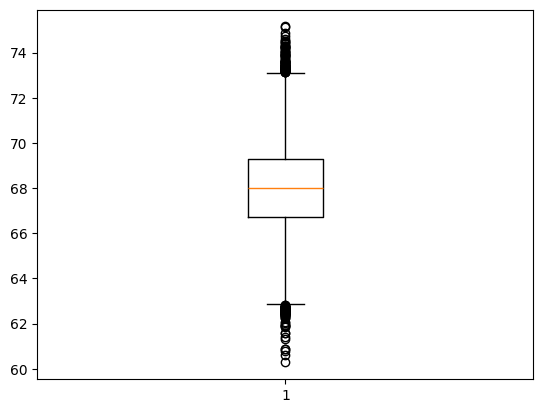

In [6]:
plt.boxplot(df['Height(Inches)'])

In [7]:
import numpy as np
def apply_outliers_zscore(data):
  outliers = []
  limit = 3
  mean = np.mean(data)
  std = np.std(data)
  for x in data:
    z_score = (x-mean)/std
    if np.abs(z_score) > limit:
      outliers.append(x)
  return outliers

In [8]:
outliers_list = apply_outliers_zscore(df['Height(Inches)'])
len(outliers_list)

51

In [9]:
for outlier_item in outliers_list:
  df = df.drop(df[df['Height(Inches)']==outlier_item].index[0])

In [10]:
df.shape

(24949, 2)

##Handling missing values

In [11]:
df.isnull().sum()

,0
Height(Inches),0
Weight(Pounds),0


##Train test split

In [12]:
x = df.drop('Weight(Pounds)', axis=1)
x.head()

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781


In [13]:
y = df['Weight(Pounds)']
y.head()

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.33, random_state=1)

In [16]:
xtrain.shape

(16715, 1)

In [17]:
xtest.shape

(8234, 1)

In [18]:
ytrain.shape

(16715,)

In [20]:
ytest.shape

(8234,)

In [21]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


## Model Building

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(xtrain, ytrain)

LinearRegression()

In [25]:
xtest.head()

,Height(Inches)
6671,66.51950
4876,65.69180
17599,65.33005
4141,66.04025
17198,64.74150


In [26]:
model.predict([[66.51950]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([122.51378256])

In [27]:
ytest.head()

,Weight(Pounds)
6671,122.4759
4876,107.2827
17599,103.7244
4141,129.1390
17198,122.2140


In [28]:
m=model.coef_
m

array([3.06689621])

In [29]:
c=model.intercept_
c

np.float64(-81.4946200650709)

In [30]:
(m*66.51950)+c

array([122.51378256])

In [33]:
ypred=model.predict(xtest)

In [34]:
ytest.head()

,Weight(Pounds)
6671,122.4759
4876,107.2827
17599,103.7244
4141,129.1390
17198,122.2140


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
test_mse = mean_squared_error(ytest, ypred)
test_mse

100.2510124036662

In [37]:
train_mse = mean_squared_error(ytrain, model.predict(xtrain))
train_mse

102.12128444887156

In [39]:
test_mae=mean_absolute_error(ytest, ypred)
test_mae

7.9557063106855495

In [40]:
train_mae=mean_absolute_error(ytrain, model.predict(xtrain))
train_mae

8.073885057359806

Text(0.5, 1.0, 'Height-Weight Data')

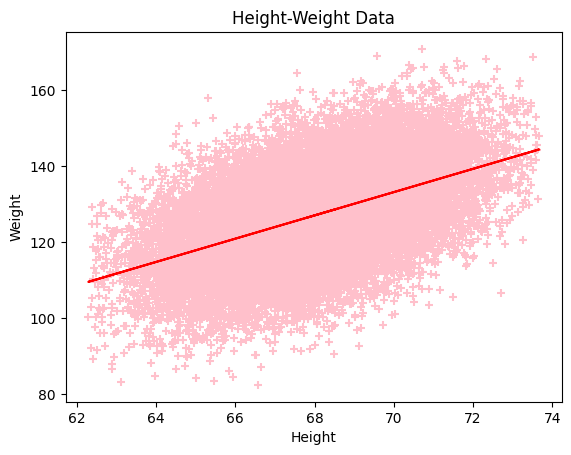

In [41]:
plt.scatter(df[['Height(Inches)']], df[['Weight(Pounds)']], color="pink", marker="+")
plt.plot(xtrain, model.predict(xtrain), color="red")
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Height-Weight Data')